In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

np.random.seed(0)

## Descriptive Analysis

In [2]:
cancer_data = pd.read_csv("breast-cancer-wisconsin.data")

In [3]:
cancer_data.head
cancer_data.columns

<bound method NDFrame.head of      Sample_number   "Clump_Thickness"  Uniformitt_Size  Uniformity_Shape  \
0          1000025                   5                1                 1   
1          1002945                   5                4                 4   
2          1015425                   3                1                 1   
3          1016277                   6                8                 8   
4          1017023                   4                1                 1   
..             ...                 ...              ...               ...   
694         776715                   3                1                 1   
695         841769                   2                1                 1   
696         888820                   5               10                10   
697         897471                   4                8                 6   
698         897471                   4                8                 8   

     Marginal_Adhesion   "Single_Epithelial_S

Index(['Sample_number', ' "Clump_Thickness"', 'Uniformitt_Size',
       'Uniformity_Shape', 'Marginal_Adhesion', ' "Single_Epithelial_Size"',
       ' "Bare_Nuclei"', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses',
       'Class'],
      dtype='object')

In [4]:
cancer_data.shape

(699, 11)

In [5]:
cancer_data.columns = ["Sample_number", "Clump_Thickness","Uniformitt_Size","Uniformity_Shape",
"Marginal_Adhesion", "Single_Epithelial_Size", "Bare_Nuclei",
"Bland_Chromatin",               
"Normal_Nucleoli",               
"Mitoses",                      
"Class"]   
cancer_data

,Sample_number,Clump_Thickness,Uniformitt_Size,Uniformity_Shape,Marginal_Adhesion,Single_Epithelial_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


 Checking if any sample is present multiple time, assuming sample number is unique

In [6]:
dictt = {}
for i in range(0,699,1):
    if cancer_data['Sample_number'][i] in dictt:
        dictt[cancer_data['Sample_number'][i]] = dictt[cancer_data['Sample_number'][i]] +1
    else:
        dictt[cancer_data['Sample_number'][i]] = 1
for i in dictt:
    if dictt[i] > 1:
        print(i, dictt[i])

1017023 2
1033078 2
1070935 2
1100524 2
1105524 2
1115293 2
1116116 2
1116192 2
1143978 2
1158247 2
1168736 2
1171710 2
1173347 2
1174057 2
1182404 6
1198641 3
1212422 2
1218860 2
1276091 5
320675 2
385103 2
411453 2
560680 2
704097 2
733639 2
798429 2
822829 2
493452 2
1114570 2
1293439 2
734111 2
1299596 2
1238777 2
1299924 2
1320077 2
769612 2
1061990 2
1240603 2
1321942 2
695091 2
1277792 2
1339781 2
1354840 2
466906 2
654546 2
897471 2


Here I choose to show the most ripetitive sample.
Another analysis showed that in fact samples are different even though the sample id remains the same

In [7]:
for i in range(0,699,1):
    if dictt[cancer_data['Sample_number'][i]] >= 6:
        print(cancer_data.loc[[i]])

     Sample_number  Clump_Thickness  Uniformitt_Size  Uniformity_Shape  \
136        1182404                4                1                 1   

     Marginal_Adhesion  Single_Epithelial_Size Bare_Nuclei  Bland_Chromatin  \
136                  1                       2           1                2   

     Normal_Nucleoli  Mitoses  Class  
136                1        1      2  
     Sample_number  Clump_Thickness  Uniformitt_Size  Uniformity_Shape  \
256        1182404                3                1                 1   

     Marginal_Adhesion  Single_Epithelial_Size Bare_Nuclei  Bland_Chromatin  \
256                  1                       2           1                1   

     Normal_Nucleoli  Mitoses  Class  
256                1        1      2  
     Sample_number  Clump_Thickness  Uniformitt_Size  Uniformity_Shape  \
257        1182404                3                1                 1   

     Marginal_Adhesion  Single_Epithelial_Size Bare_Nuclei  Bland_Chromatin  \


There are multiples of the same sample, with the same sampleID. We now could take different approaches, and since we do not have any temporal variable, we can not understand wich sample came first. If we had a temporal variable, we maybe could have taken the first sample since it rappresents the first time (atleast in theory) that the patient discovered his cancer, while he/she was not using any kind of medication, thus that being the most 'pure' example of an early cancer of that stage. The medications could distort the variables, and we would need futher analysis to understand if the medications could modify a stage 2 cell to make it look like a non malignant cell, if that were the case, we would discard any further analysis, cause it could give a higher percentage of false errors. In this case is needed a consult with the clinician to investigate futher.

In [8]:
cancer_data =cancer_data.drop("Sample_number", axis = 1)

In [9]:
pd.isna(cancer_data).any(axis = 0)

Clump_Thickness           False
Uniformitt_Size           False
Uniformity_Shape          False
Marginal_Adhesion         False
Single_Epithelial_Size    False
Bare_Nuclei               False
Bland_Chromatin           False
Normal_Nucleoli           False
Mitoses                   False
Class                     False
dtype: bool

In [10]:
names = cancer_data.columns
for col in cancer_data.columns:
    print(f'{col}: {cancer_data[col].unique()}\n')

Clump_Thickness: [ 5  3  6  4  8  1  2  7 10  9]

Uniformitt_Size: [ 1  4  8 10  2  3  7  5  6  9]

Uniformity_Shape: [ 1  4  8 10  2  3  5  6  7  9]

Marginal_Adhesion: [ 1  5  3  8 10  4  6  2  9  7]

Single_Epithelial_Size: [ 2  7  3  1  6  4  5  8 10  9]

Bare_Nuclei: ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']

Bland_Chromatin: [ 3  9  1  2  4  5  7  8  6 10]

Normal_Nucleoli: [ 1  2  7  4  5  3 10  6  9  8]

Mitoses: [ 1  5  4  2  3  7 10  8  6]

Class: [2 4]



Bare Nuclei is considered to be a char, that is caused by the insertion of a ? in bare nuclei values. I will then eliminate the '?' values to continue the analysis

In [11]:
cancer_data.shape

(699, 10)

In [12]:
import math
counter = 0
for x in range(0,10,1):
    for y in range(0,698,1):
        if cancer_data[names[x]][y] == '?':
            counter += 1
print(counter)

16


In [13]:
for x in range(0, 10,1):
    cancer_data = cancer_data[cancer_data[names[x]]!= '?']

In [14]:
cancer_data = cancer_data.reset_index(drop=True)
cancer_data = cancer_data.astype(np.float64)

In [15]:
cancer_data.shape

(683, 10)

## Visual Analysis

some visualization tools are needed to give an understanding about how the dataset is composed. This could be useful to check if the variables predicted by our feature selection model are coherent with the graphs.

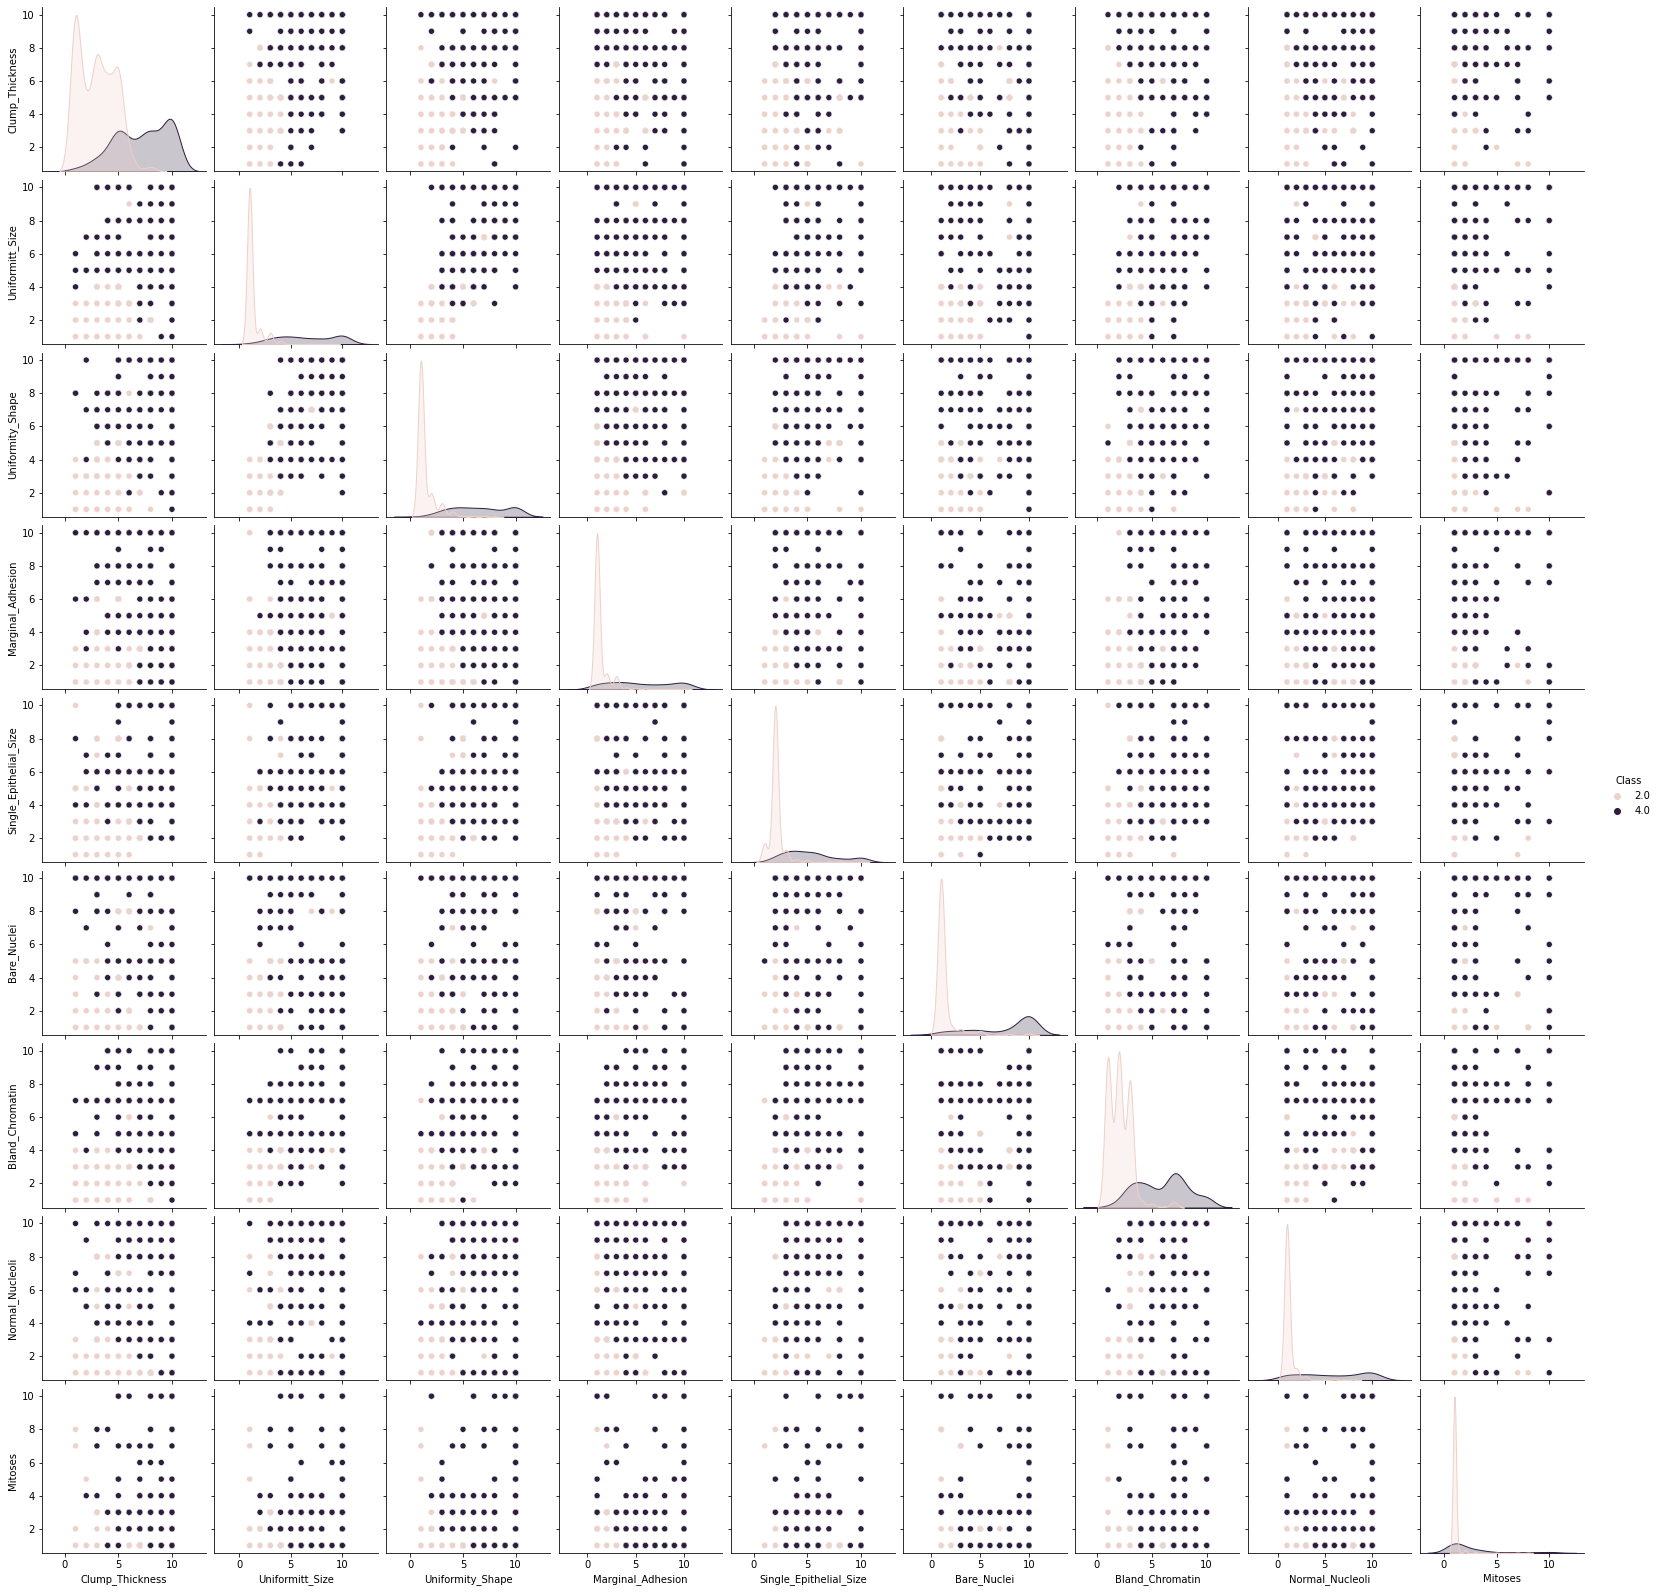

In [16]:
sns.pairplot(cancer_data, hue = 'Class')

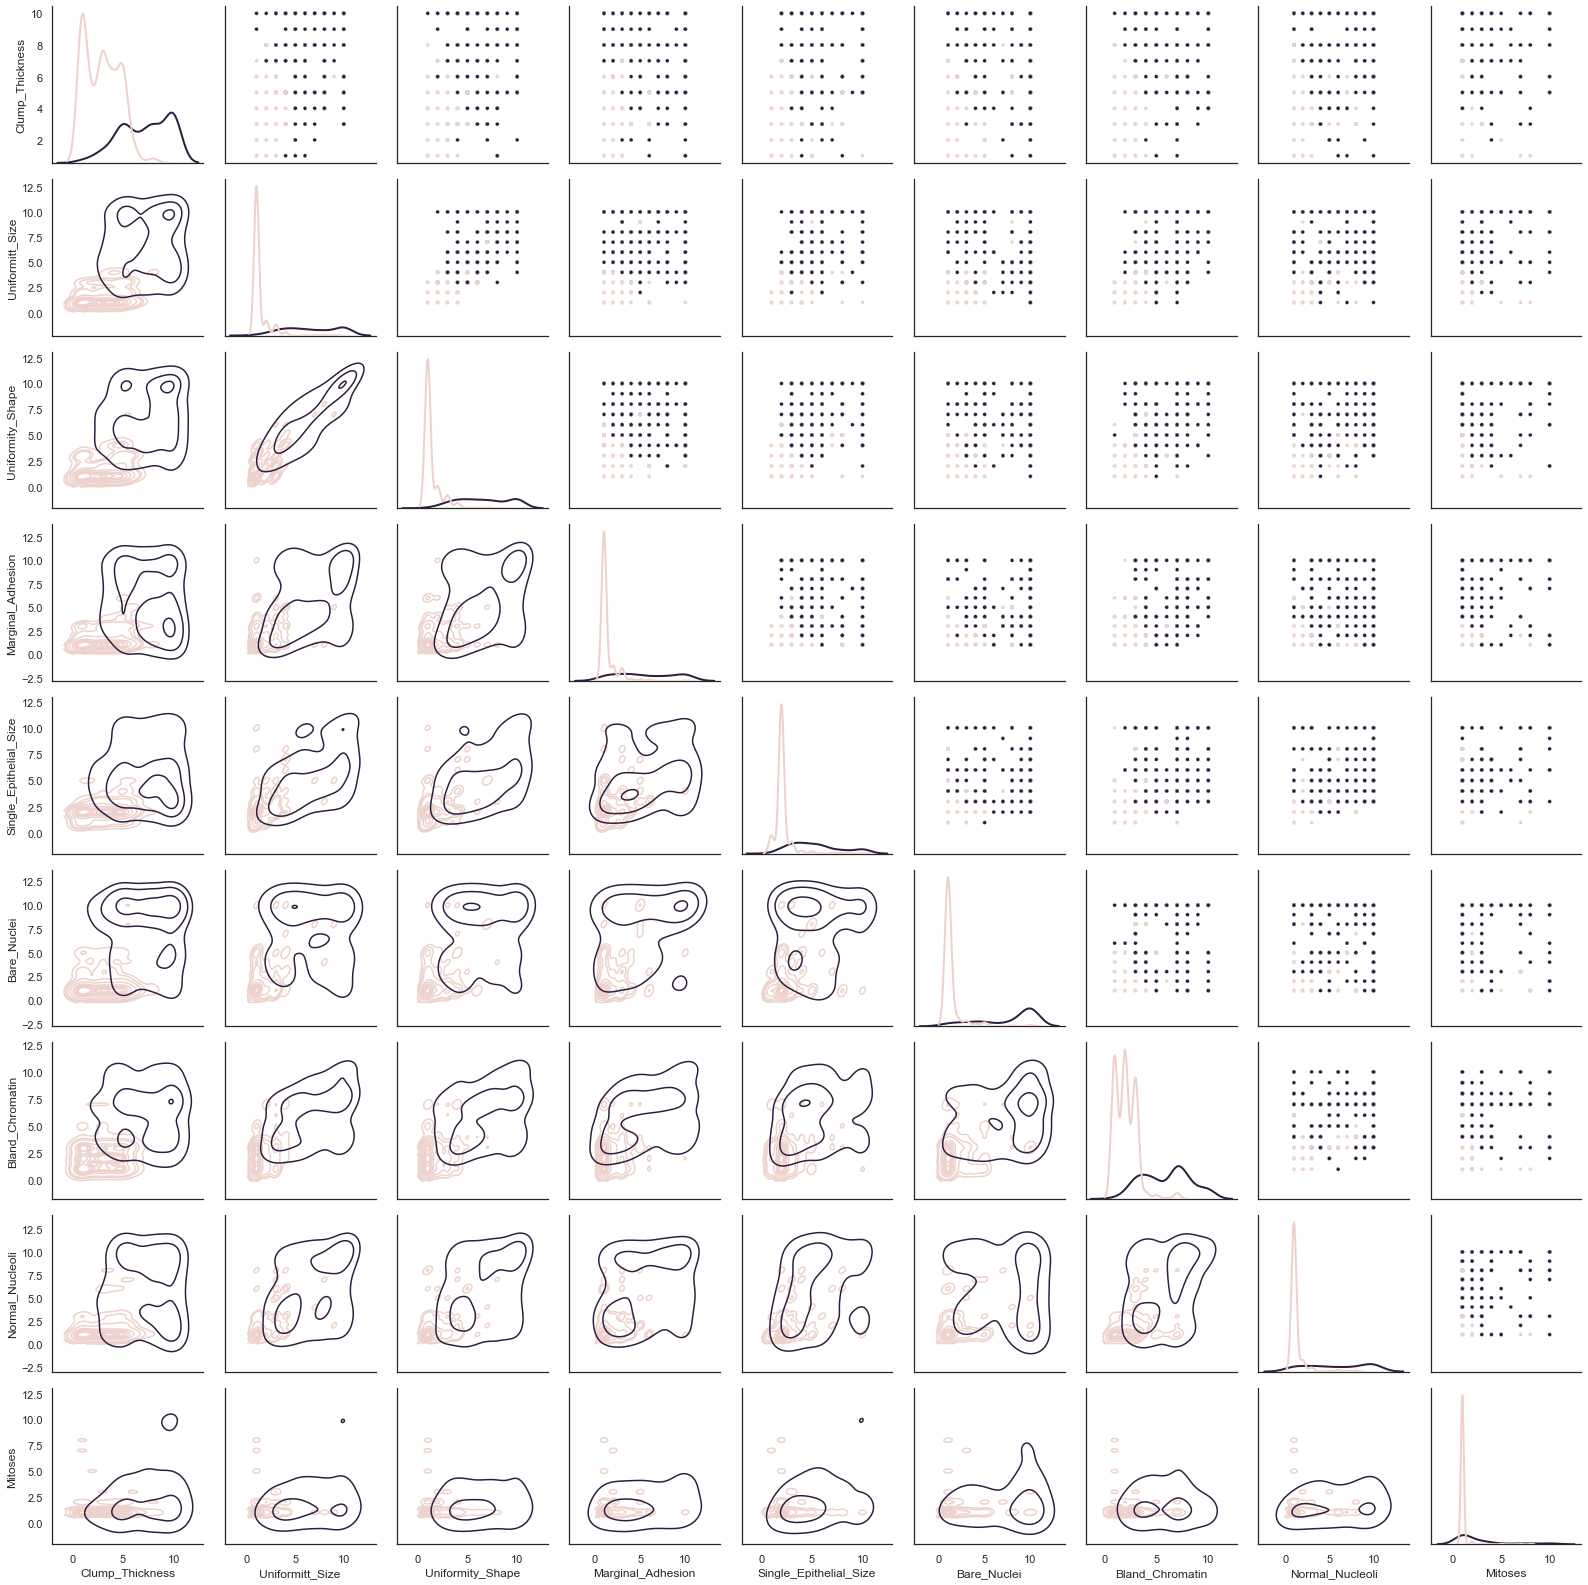

In [17]:
sns.set_theme(style="white")

g = sns.PairGrid(cancer_data, diag_sharey=False, hue = 'Class')
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

It seems like there is a clear divisione between class 2 cancer cells, that shows a lower variance, and class 4 cancer cells, that show overall a greater variance and overall more extreme values

[0.71478993 0.82080144 0.82189095 0.70629414 0.69095816 0.82269587
 0.75822755 0.71867719 0.42344792 1.        ]


<AxesSubplot:>

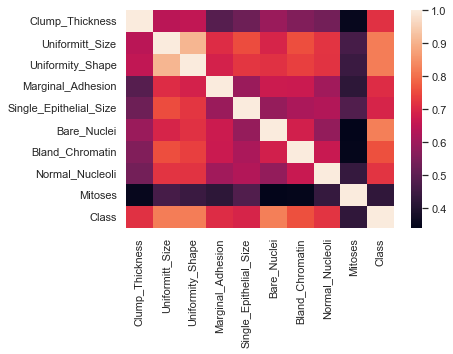

In [18]:
print(cancer_data.corr().to_numpy()[:,-1])
sns.heatmap(cancer_data.corr())

By this corplot we can see that uniformity size, uniformity shape and bare nuclei seem to be the most important variables in predicting the cancer class.
We can also see from the first two graphs that the distribution of the two classes seems fairly divisible, this could suggest that the classification models could give us a high enough accuracy

In [19]:
names = cancer_data.drop('Class', axis = 1)
names = names.columns
y = cancer_data['Class'].to_numpy().astype(np.float32)
X = cancer_data[names]

In [20]:
y
y = np.where(y == 4, 1, 0)
y

array([2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2., 2., 4., 2., 4., 4., 2.,
       2., 4., 2., 4., 4., 2., 2., 4., 2., 2., 2., 2., 2., 2., 4., 2., 2.,
       2., 4., 2., 4., 4., 4., 4., 4., 4., 2., 4., 2., 2., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 2., 4., 2., 4., 4., 2.,
       2., 4., 2., 4., 4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 4., 4.,
       4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 4., 4., 4., 2., 4.,
       4., 4., 4., 4., 2., 4., 2., 4., 4., 4., 2., 2., 2., 4., 2., 2., 2.,
       2., 4., 4., 4., 2., 4., 2., 4., 2., 2., 2., 4., 2., 2., 2., 2., 2.,
       2., 2., 2., 4., 2., 2., 4., 2., 2., 4., 2., 4., 4., 2., 2., 4., 2.,
       2., 4., 4., 2., 2., 2., 2., 4., 4., 2., 2., 2., 2., 2., 4., 4., 4.,
       2., 4., 2., 4., 2., 2., 2., 4., 4., 2., 4., 4., 4., 2., 4., 4., 2.,
       2., 2., 2., 2., 2., 2., 2., 4., 4., 2., 2., 2., 4., 4., 2., 2., 2.,
       4., 4., 2., 4., 4., 4., 2., 2., 4., 2., 2., 4., 4., 4., 4., 2., 4.,
       4., 2., 4., 4., 4.

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

I decided to set the target class as 0 or 1, showing the correct transoformation, considering the use of ROC curve as analysis, that needs 0 or 1 to correctly function

## Model Selection

In [21]:
split_seed = 1
split_test_size = 0.2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed, stratify = y)

X = X_train.to_numpy()
X_t = X_test.to_numpy()

Thanks to the stratify function in the train_test_split() function the split is able to mantain the same proportions in the different split sets. Without the stratification on the y variable the results could change drastically.

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression             # 1- model selection
model = LogisticRegression(solver="newton-cg", penalty='none')  # 2- hyperparams
model.fit(X, y_train)  

LogisticRegression(penalty='none', solver='newton-cg')

In [23]:
def accuracy(y_pred, y_true):
    return (y_pred == y_true).mean()

In [24]:
print("Train accuracy:", accuracy(y_train, model.predict(X)))
print("Test accuracy:", accuracy(y_test, model.predict(X_t)))

Train accuracy: 0.9725274725274725
Test accuracy: 0.9708029197080292


The logistic regression method gives a .97 accuracy score on the test set, wich is very high but seems reasonable since as seen before the two classes are highly separable

## Z-test

In [25]:
from scipy.stats import norm, zscore

def z_test(X, y, model, names, alpha=None):
    n_samples, n_features = X.shape
    betas = np.concatenate([model.intercept_, model.coef_.reshape(-1)])
    
    # Compute the prediction
    pred = model.predict_proba(X) # [N, 2]
    y = y.reshape(-1)    
    X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    n_samples, n_features = X.shape
    
    V = np.diagflat(np.product(pred, axis=1))
    covLogit = np.linalg.inv(np.dot(np.dot(X.T, V), X))
    se_b = np.sqrt(np.diag(covLogit)) 
    
    z_stat_b = (betas-0)/se_b

    # Compute the p-value (two-sided test)
    p_values = np.array([2 * norm.sf(np.abs(z_stat)) for z_stat in z_stat_b])
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = np.round(se_b, decimals=4)
    df["Z-stat"] = np.round(z_stat_b, decimals=1)
    df["p-value"] = p_values
    if alpha:
        rejectH0 = p_values < alpha
        df["reject H0"] = rejectH0    
    
    return df

z_test(X, y_train, model, ["Intercept", "Clump_Thickness","Uniformitt_Size","Uniformity_Shape",
"Marginal_Adhesion", "Single_Epithelial_Size", "Bare_Nuclei",
"Bland_Chromatin",               
"Normal_Nucleoli",               
"Mitoses" ], alpha=0.001)

,Name,Coefficients,Standard Errors,Z-stat,p-value,reject H0
0,Intercept,-10.223593,1.3262,-7.7,1.268175e-14,True
1,Clump_Thickness,0.602308,0.1688,3.6,3.605275e-04,True
2,Uniformitt_Size,0.113231,0.2684,0.4,6.730686e-01,False
3,Uniformity_Shape,0.262619,0.2878,0.9,3.614398e-01,False
4,Marginal_Adhesion,0.296013,0.1320,2.2,2.497516e-02,False
5,Single_Epithelial_Size,0.215808,0.1814,1.2,2.342301e-01,False
6,Bare_Nuclei,0.364447,0.1030,3.5,4.003607e-04,True
7,Bland_Chromatin,0.394777,0.1969,2.0,4.495996e-02,False
8,Normal_Nucleoli,0.145780,0.1280,1.1,2.547953e-01,False
9,Mitoses,0.292593,0.3502,0.8,4.033881e-01,False


I decided to set the alpha value as 0.001, this gives us a good rappresentation of just the most decisive variable in deciding the target class, wich in this case are bare nuclei and clump thickness

## Feature selection

In [26]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator   

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=0)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, 
                      subsets_evaluator, subsets_argbest,       
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  
                      subsets_scorer_name=None,     
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = DummyRegressor()
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    
    # 2. Evaluate all Mk candidates with
    #    k=0...P features
    # =========================================
    for dim in range(num_features):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = LogisticRegression(solver="newton-cg", penalty='none')
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Update selected feature
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim+1, dim+1, best_features))
            print("M{} subset score (3.): {}".format(dim+1, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n Best configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how te 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

............
Best model (M1) with 1 features: ['Uniformitt_Size']
M1 subset score (3.): 0.9322101751459548
............
Best model (M2) with 2 features: ['Uniformitt_Size', 'Bare_Nuclei']
M2 subset score (3.): 0.9523603002502086
............
Best model (M3) with 3 features: ['Uniformitt_Size', 'Bare_Nuclei', 'Clump_Thickness']
M3 subset score (3.): 0.9615179316096748
............
Best model (M4) with 4 features: ['Uniformitt_Size', 'Bare_Nuclei', 'Clump_Thickness', 'Bland_Chromatin']
M4 subset score (3.): 0.9615512927439533
............
Best model (M5) with 5 features: ['Uniformitt_Size', 'Bare_Nuclei', 'Clump_Thickness', 'Bland_Chromatin', 'Single_Epithelial_Size']
M5 subset score (3.): 0.9670225187656382
............
Best model (M6) with 6 features: ['Uniformitt_Size', 'Bare_Nuclei', 'Clump_Thickness', 'Bland_Chromatin', 'Single_Epithelial_Size', 'Mitoses']
M6 subset score (3.): 0.9688407005838199
............
Best model (M7) with 7 features: ['Uniformitt_Size', 'Bare_Nuclei', 'Clump

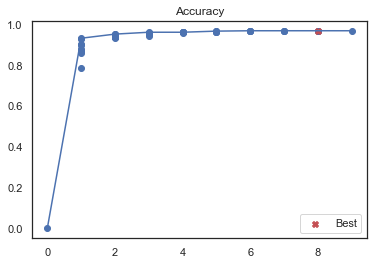

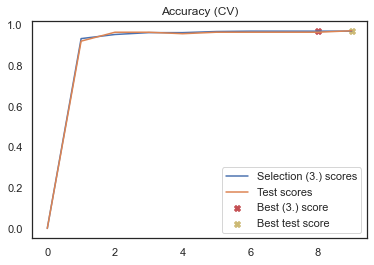

In [27]:
cv = 5
forward_selection(X_train, y_train, X_test, y_test,
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 3.
                  get_evaluator(make_scorer(accuracy)), np.argmax, # test
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

The forward feature selection variables are: Uniformitt_Size, Bare_Nuclei, Clump_Thickness, Bland_Chromatin, Single_Epithelial_Size, Mitoses, Normal_Nucleoli, Uniformity_Shape.
The use of those variables could reduce overfitting since they seem the mose usefull ones to correctly predict the target class

## Lasso

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

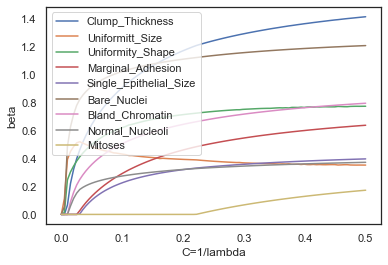

In [28]:
# performing the lasso
C_vals = np.linspace(1e-4, 0.5, 100)
betas = []

from sklearn import preprocessing
X_std = preprocessing.scale(X)

for C in C_vals:
    model = LogisticRegression(solver='saga', penalty='l1', C=C)
    model.fit(X_std, y_train)
    beta = model.coef_.reshape(-1)
    betas.append(beta)
betas = np.stack(betas, axis=1)

# plotting the result to visualize which are the most significant features
for beta, name in zip(betas, names):
    plt.plot(C_vals, beta, label=name)
plt.legend()
plt.xlabel("C=1/lambda")
plt.ylabel("beta");

As seen in this Lasso regression, the most usefull variables were already found with the forward feature selection, in particular the variable that seem to be not correlated with the prediction of the target class is mitoses wich was the added in the 6th model of forward feature selection. These results seem to be correctly suggested by out graph analysis

In [29]:
X_feat = ['Uniformitt_Size', 'Bare_Nuclei', 'Clump_Thickness', 'Bland_Chromatin', 'Single_Epithelial_Size', 'Mitoses', 'Normal_Nucleoli', 'Uniformity_Shape']

In [30]:
X = cancer_data[X_feat]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed, stratify = y)

X = X_train.to_numpy()
X_t = X_test.to_numpy()

I will now use the feature found thanks to the forward feature selection, showing a comparison between the logistic regression using all the features and the logistic regression using only the feature that the forward feature selection suggested

In [31]:
model = LogisticRegression(solver="newton-cg", penalty='none')  # 2- hyperparams
model.fit(X, y_train)
print("Train accuracy:", accuracy(y_train, model.predict(X)))
print("Test accuracy:", accuracy(y_test, model.predict(X_t)))

LogisticRegression(penalty='none', solver='newton-cg')

Train accuracy: 0.9725274725274725
Test accuracy: 0.9635036496350365


The results seem to suggest that the logistic regression using only the feature found with the feature selection can predict in a poorer way compared with the model with all the features. I will then select all the features to train my models

In [32]:
X = cancer_data[names]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed, stratify = y)

X = X_train.to_numpy()
X_t = X_test.to_numpy()

## Linear Discriminant Analysis

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

model = LDA(store_covariance=True)
model = model.fit(X, y_train)

print("Train accuracy:", accuracy(y_train, model.predict(X)))
print("Test accuracy:", accuracy(y_test, model.predict(X_t)))


Train accuracy: 0.9615384615384616
Test accuracy: 0.9635036496350365


With polynomial features

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('lda', LDA(store_covariance=True))])
model = model.fit(X, y_train)

print("Train accuracy:", accuracy(y_train, model.predict(X)))
print("Test accuracy:", accuracy(y_test, model.predict(X_t)))

Train accuracy: 0.9743589743589743
Test accuracy: 0.9708029197080292


while LDA is predicting worse compared with LR, LDA with polynomial features and a degree of two has the same test accuracy of LR, making it a good candidate

## Quadratic Discriminant Analysis 

In [35]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [36]:
model = QDA(store_covariance=True)
model = model.fit(X, y_train)

print("Train accuracy:", accuracy(y_train, model.predict(X)))
print("Test accuracy:", accuracy(y_test, model.predict(X_t)))


Train accuracy: 0.9578754578754579
Test accuracy: 0.9562043795620438


Searching the best degree for LDA

In [37]:
from sklearn.model_selection import GridSearchCV

model = Pipeline([('poly', PolynomialFeatures()),
                  ('lda', LDA(store_covariance=True))])
params = {'poly__degree': range(1, 6)}
cv = GridSearchCV(model, params, refit=True, cv=10, 
                  scoring=make_scorer(accuracy)) #tries al possibile values
cv.fit(X, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('lda',
                                        LinearDiscriminantAnalysis(store_covariance=True))]),
             param_grid={'poly__degree': range(1, 6)},
             scoring=make_scorer(accuracy))

In [38]:
cv.best_params_
cv.best_score_
pd.DataFrame(cv.cv_results_)

{'poly__degree': 2}

0.9651515151515152

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001211,0.000133,0.000112,0.000012,1,{'poly__degree': 1},0.963636,0.963636,0.927273,0.981818,1.000000,0.963636,0.981481,0.925926,0.907407,0.981481,0.959630,0.028347,2
1,0.003967,0.000706,0.000231,0.000129,2,{'poly__degree': 2},0.963636,0.963636,0.963636,0.945455,1.000000,0.981818,1.000000,0.944444,0.907407,0.981481,0.965152,0.026704,1
2,0.022210,0.001960,0.000417,0.000180,3,{'poly__degree': 3},0.909091,0.818182,0.818182,0.818182,0.818182,0.872727,0.814815,0.814815,0.833333,0.888889,0.840640,0.033835,3
3,0.093495,0.017097,0.000500,0.000131,4,{'poly__degree': 4},0.818182,0.800000,0.800000,0.890909,0.800000,0.800000,0.777778,0.759259,0.796296,0.833333,0.807576,0.033615,4
4,0.291785,0.035326,0.000698,0.000284,5,{'poly__degree': 5},0.800000,0.890909,0.763636,0.872727,0.781818,0.836364,0.722222,0.796296,0.703704,0.833333,0.800101,0.057425,5


  (best 2) CV accuracy: 0.9651515151515152
  (best 2) Test accuracy: 0.9708029197080292


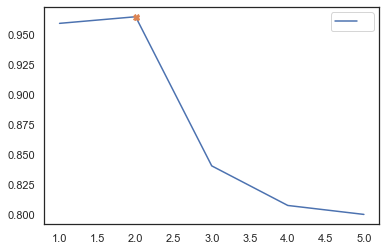

In [39]:
def show_results(cv, X_test, params, prefix=''):
    prefix = ' '+prefix    
    results = pd.DataFrame(cv.cv_results_)
    # Plot the CV (mean) scores for all possible parameters
    plt.plot(results[params],results['mean_test_score'], label=prefix)

    # Find the best
    best_idx =np.argmax(results['mean_test_score']) #Returns the indices of the maximum values along an axis.
    # Plot it as a cross
    plt.plot(results[params][best_idx],
             results['mean_test_score'][best_idx], marker='X')
    plt.legend()

    print(prefix, f"(best {results[params][best_idx]}) CV accuracy:",  cv.best_score_)
    print(prefix, f"(best {results[params][best_idx]}) Test accuracy:", accuracy(y_test, cv.best_estimator_.predict(X_test)))
    
show_results(cv, X_t, 'param_poly__degree')

A degree of two seems to be the correct one to obtain the highest accuracy possible

## KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
model = KNeighborsClassifier()
model.fit(X, y_train)

print("Train accuracy:", accuracy(y_train, model.predict(X)))
print("Test accuracy:", accuracy(y_test, model.predict(X_t)))

KNeighborsClassifier()

Train accuracy: 0.9761904761904762
Test accuracy: 0.9708029197080292


In [41]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
params = {'n_neighbors': range(1, 15)}
folds = 10
scorer = make_scorer(accuracy)

cv = GridSearchCV(model, params, cv = folds, scoring = scorer )
cv.fit(X, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)},
             scoring=make_scorer(accuracy))

  (best 3) CV accuracy: 0.9706060606060607
  (best 3) Test accuracy: 0.9635036496350365


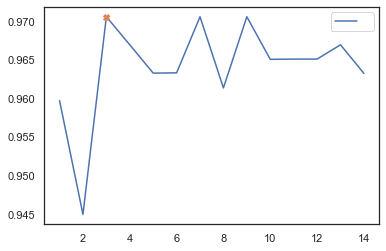

In [42]:
show_results(cv, X_t, "param_n_neighbors")

## SVM

In [43]:
# searching for the best kernel function between polynomial, rbf and sigmoid

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
svm_poly.fit(X, y_train)

# RBF
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}
rbf_poly = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_poly.fit(X, y_train)

# Sigmoid
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid'), param_grid, 
                         cv=5, scoring='accuracy', refit=True)
sigm_poly.fit(X, y_train);

In [44]:
for m, n in [(svm_poly, 'Polynomial'), (rbf_poly, 'Radial basis function'), (sigm_poly, 'Sigmoid')]:
    cv_score = m.best_score_
    m = m.best_estimator_    
    train_acc = accuracy_score(y_train, m.predict(X))
    test_acc = accuracy_score(y_test, m.predict(X_test))
    print("kernel: {}".format(n))
    print("cv score: {}".format(cv_score))
    print("train score: {}".format(train_acc))
    print("test score: {}\n".format(test_acc))

kernel: Polynomial
cv score: 0.9706922435362803
train score: 0.9743589743589743
test score: 0.9635036496350365

kernel: Radial basis function
cv score: 0.9706922435362803
train score: 0.9743589743589743
test score: 0.9708029197080292

kernel: Sigmoid
cv score: 0.9706922435362803
train score: 0.9725274725274725
test score: 0.9635036496350365



The best test possible is 0.9708 as seen as with other models before. This seem a high enough accuracy to be useful and seems like a hard threshold with the data at our disposal. I will now compare all the models.

## Comparison between models

lr CV score: 0.9688,  test score 0.9708
lda CV score: 0.9579,  test score 0.9635
lda_poly CV score: 0.9616,  test score 0.9708
qda CV score: 0.9524,  test score 0.9562
knn CV score: 0.9743,  test score 0.9708
knn_std CV score: 0.9725,  test score 0.9635
knn_minmax CV score: 0.9743,  test score 0.9708
rbf CV score: 0.9707,  test score 0.9708


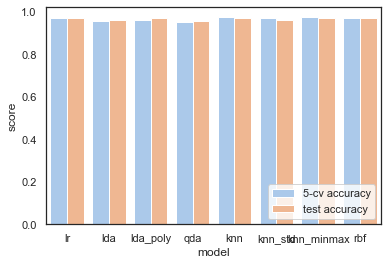

In [45]:
# logistic regression
lr = LogisticRegression()
# normal Linear discriminant analysis
lda = LDA()
# polynomial Linear discriminant analysis
lda_poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                     ('lda', LDA(store_covariance=True))])
# Quadratic discriminant analysis
qda = QDA()
# KNN without normalization
knn = KNeighborsClassifier(n_neighbors=9)
# KNN standard normalization
knn_std = Pipeline([
    ('norm', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=8))])
# KNN minmax normalization
knn_minmax = Pipeline([
    ('norm', MinMaxScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=9))])

# in the collection even the best model with SVM (rbf) is added
from collections import OrderedDict
models = OrderedDict([
    ('lr', lr), ('lda', lda), ('lda_poly', lda_poly), ('qda', qda),
    ('knn', knn), ('knn_std', knn_std), ('knn_minmax', knn_minmax), ('rbf', rbf_poly)])

cv_scores, test_scores = [], []
for name, model in models.items():
    scores = cross_val_score(model, X, y_train, cv =5, scoring = make_scorer(accuracy))
    cv_score = scores.mean()  
    cv_scores.append(cv_score)
    
    model.fit(X, y_train)
    test_score = accuracy(y_test, model.predict(X_test))
    test_scores.append(test_score)
    print("{} CV score: {:.4f},  test score {:.4f}".format(name, cv_score, test_score))

data = pd.DataFrame()
data['model'] = list(models.keys()) * 2
data['metric'] = ['5-cv accuracy'] * len(cv_scores) + ['test accuracy'] * len(test_scores)
data['score'] = cv_scores + test_scores

sns.barplot(x='model', y='score', data=data, hue='metric', palette="pastel")
plt.legend(loc='lower right');

I will now use the KNN with a standard scaler to plot the confusion matrix

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [47]:
#compute functions givent the result of cm 
def sensitivity(cm): # true posivite over all positive. 
    TP = cm[1,1]
    T= cm[1,:].sum()
    return TP / T 

def specificity(cm):
    TN = cm[0,0]
    N = cm[0,:].sum()
    return TN/N

def precision(cm):
    TP = cm[1,1]
    TPFP =  cm[:,1].sum()
    return TP/TPFP

def f1(cm):
    p= precision(cm)
    r = sensitivity(cm)
    return 2 * (p * r) / (p + r)


In [48]:
from sklearn.metrics import roc_curve

def plot_roc(predict_fn, X, y, label=None):
    fprs, tprs, t = roc_curve(y, predict_fn(X)[:,1])
    
    # Plot the ROC
    plt.plot(fprs, tprs, label = "ROC " +label)

    plt.xlabel("FPR = 1 - specificity")
    plt.ylabel("TPR = sensitivity")
    plt.legend()

LogisticRegression()

Sensitivity  0.9583333333333334
Specificity  0.9775280898876404
Precision  0.9583333333333334
F1-score 0.9583333333333334


Pipeline(steps=[('poly', PolynomialFeatures()),
                ('lda', LinearDiscriminantAnalysis(store_covariance=True))])

Sensitivity  0.9791666666666666
Specificity  0.9662921348314607
Precision  0.94
F1-score 0.9591836734693877


KNeighborsClassifier(n_neighbors=9)

Sensitivity  0.9583333333333334
Specificity  0.9775280898876404
Precision  0.9583333333333334
F1-score 0.9583333333333334


Pipeline(steps=[('norm', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

Sensitivity  0.9583333333333334
Specificity  0.9775280898876404
Precision  0.9583333333333334
F1-score 0.9583333333333334


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

Sensitivity  0.9583333333333334
Specificity  0.9775280898876404
Precision  0.9583333333333334
F1-score 0.9583333333333334


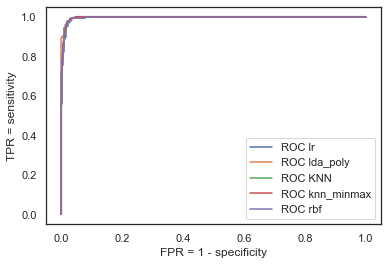

In [49]:
for name, model in [('lr', lr), 
                    ('lda_poly', lda_poly),
                    ('KNN', knn),
                    ('knn_minmax', knn_minmax), 
                    ('rbf', rbf_poly)]:
    
    model.fit(X, y_train)
    plot_roc(model.predict_proba, X, y_train, name)
    cm = confusion_matrix(y_test, model.predict(X_test))
    print("Sensitivity ", sensitivity(cm))
    print("Specificity ", specificity(cm))
    print("Precision ", precision(cm))
    print("F1-score", f1(cm));

Considering we are predicting a tumor sample class, and considering the prognosis of a tumor of class four is worse, we should take the model with the highest sensitivity and highest specificity, in this case being **LDA with polynomial features**

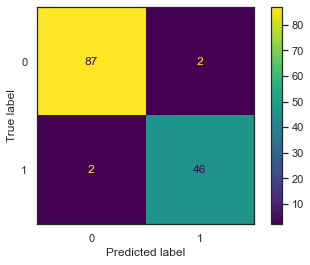

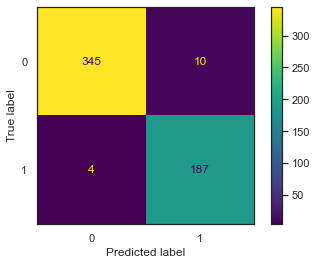

In [50]:
cm = confusion_matrix(y_test, lda_poly.predict(X_t))

# Plot test confution matrix
plot_confusion_matrix(model, X_t, y_test)
# Plot train confution matrix
plot_confusion_matrix(model, X, y_train)

In [51]:
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

Sensitivity  0.9791666666666666
Specificity  0.9662921348314607
Precision  0.94
F1-score 0.9591836734693877


This is the model I chosed to correctly predict the test data, it seem to have the highest sensitivity and the highest specificity of all, making it a good candidare for futher testing.